In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import t,f

In [2]:
drive.mount('/content/Drive/')

Mounted at /content/Drive/


# 1) model 2 (glbwarm data)

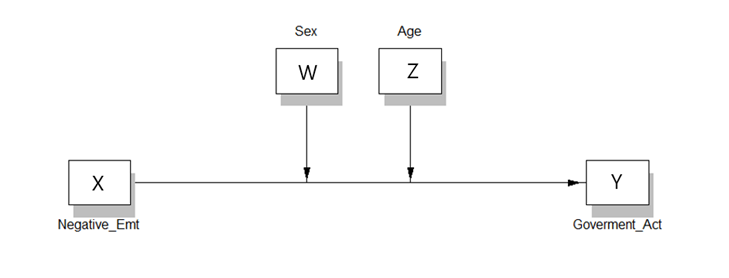

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


In [ ]:
data_2 = pd.read_csv('/content/Drive/MyDrive/논문/model_2.csv', index_col=0)
data_2.head()

,govact,posemot,negemot,ideology,age,sex,partyid
1,3.6,3.67,4.67,6,61,0,2
2,5.0,2.00,2.33,2,55,0,1
3,6.6,2.33,3.67,1,85,1,1
4,1.0,5.00,5.00,1,59,0,1
5,4.0,2.33,1.67,4,22,1,1


In [ ]:
res_y = ols('govact ~ negemot', data=data_2).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     407.3
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           9.59e-74
Time:                        15:50:25   Log-Likelihood:                -1241.3
No. Observations:                 815   AIC:                             2487.
Df Residuals:                     813   BIC:                             2496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7573      0.099     27.948      0.000       2.564       2.951
negemot        0.5142      0.025     20.183      0.000       0.464       0.564
==============================================================================
Omnibus:                       17.285   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.956
Skew:                          -0.335   Prob(JB):                     0.000126
Kurtosis:                       3.283   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_num = len(data_2)
data_num

815

In [ ]:
res_y = ols('govact ~ negemot + sex + age + negemot * sex + negemot * age', data=data_2).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     94.41
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.49e-78
Time:                        13:58:42   Log-Likelihood:                -1219.5
No. Observations:                 815   AIC:                             2451.
Df Residuals:                     809   BIC:                             2479.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4748      0.329     13.619      0.000       3.830       5.120
negemot         0.1154      0.085      1.365      0.173      -0.051       0.281
sex            -0.8449      0.201     -4.212      0.000      -1.239      -0.451
age            -0.0241      0.006     -3.865      0.000      -0.036      -0.012
negemot:sex     0.2208      0.052      4.261      0.000       0.119       0.322
negemot:age     0.0054      0.002      3.322      0.001       0.002       0.009
==============================================================================
Omnibus:                       11.252   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.694
Skew:                          -0.246   Prob(JB):                      0.00289
Kurtosis:                       3.318   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res_y.params

Intercept      4.474817
negemot        0.115431
sex           -0.844894
age           -0.024140
negemot:sex    0.220769
negemot:age    0.005411
dtype: float64

----

In [ ]:
Y = data_2['govact']

In [ ]:
X = np.array(data_2['negemot'])
W = np.array(data_2['sex'])
Z = np.array(data_2['age'])

In [ ]:
X.shape

(815,)

In [ ]:
Y_hat = 4.474817 + 0.115431 * X -0.844894 * W -0.024140 * Z + 0.220769 * X * W + 0.005411 * X * Z

* R^2 & F

In [ ]:
TSS = ((Y-Y.mean())**2).sum()
SSR = ((Y_hat-Y.mean())**2).sum()
SSE = ((Y-Y_hat)**2).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.36848481101390584


In [ ]:
F = (SSR/5) / (SSE/809)
print(F)

94.40306002260358


In [ ]:
f_rv = f(5, 809)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

* p-value

In [ ]:
mse = ((Y-Y_hat)**2).sum() / 809
print(mse)

1.1760250198772153


In [ ]:
t_rv = t(df=809)

In [ ]:
one = np.ones((data_num))

In [ ]:
X_mat = np.array([one, X, W, Z, X*W, X*Z])

In [ ]:
X_mat_re = X_mat.T
X_mat_re

array([[  1.  ,   4.67,   0.  ,  61.  ,   0.  , 284.87],
       [  1.  ,   2.33,   0.  ,  55.  ,   0.  , 128.15],
       [  1.  ,   3.67,   1.  ,  85.  ,   3.67, 311.95],
       ...,
       [  1.  ,   1.67,   1.  ,  72.  ,   1.67, 120.24],
       [  1.  ,   3.33,   0.  ,  36.  ,   0.  , 119.88],
       [  1.  ,   6.  ,   1.  ,  82.  ,   6.  , 492.  ]])

In [ ]:
XX = X_mat_re.T @ X_mat_re
XX

array([[8.15000000e+02, 2.89976000e+03, 3.98000000e+02, 4.03720000e+04,
        1.34305000e+03, 1.42487100e+05],
       [2.89976000e+03, 1.22189002e+04, 1.34305000e+03, 1.42487100e+05,
        5.53160670e+03, 5.99831037e+05],
       [3.98000000e+02, 1.34305000e+03, 3.98000000e+02, 2.08160000e+04,
        1.34305000e+03, 6.97157000e+04],
       [4.03720000e+04, 1.42487100e+05, 2.08160000e+04, 2.21696400e+06,
        6.97157000e+04, 7.76858136e+06],
       [1.34305000e+03, 5.53160670e+03, 1.34305000e+03, 6.97157000e+04,
        5.53160670e+03, 2.88016654e+05],
       [1.42487100e+05, 5.99831037e+05, 6.97157000e+04, 7.76858136e+06,
        2.88016654e+05, 3.26353589e+07]])

In [ ]:
cov_mat = np.linalg.inv(XX)
cov_mat

array([[ 9.17962734e-02, -2.19054968e-02, -6.25193580e-03,
        -1.56107555e-03,  1.24154544e-03,  3.75832446e-04],
       [-2.19054968e-02,  6.08011350e-03,  1.26316923e-03,
         3.75880557e-04, -3.09750754e-04, -1.05551103e-04],
       [-6.25193580e-03,  1.26316923e-03,  3.42076607e-02,
        -2.56275418e-04, -8.14957316e-03,  6.39315875e-05],
       [-1.56107555e-03,  3.75880557e-04, -2.56275418e-04,
         3.31630877e-05,  6.43269272e-05, -8.00734713e-06],
       [ 1.24154544e-03, -3.09750754e-04, -8.14957316e-03,
         6.43269272e-05,  2.28254437e-03, -1.77749740e-05],
       [ 3.75832446e-04, -1.05551103e-04,  6.39315875e-05,
        -8.00734713e-06, -1.77749740e-05,  2.25613369e-06]])

In [ ]:
cov_mat.shape

(6, 6)

In [ ]:
se_0 = np.sqrt(cov_mat[0,0]*mse)
se_0

0.32856462726389585

In [ ]:
t_0 = 4.4748 / se_0 # t통계량값
t_0

13.619238434957698

In [ ]:
(1 - t_rv.cdf(13.619238434957698))*2 # p_value값

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1,1]*mse)
se_1

0.08455983441281212

In [ ]:
t_1 = 0.1154 / se_1 # t통계량값
print(t_1)

1.3647141199050778


In [ ]:
(1 - t_rv.cdf(1.3647141199050778))*2 # p_value값

0.1727223669111866

## * 𝑌=4.4748+0.1154𝑋−0.8449𝑊−0.0241𝑍+0.2208𝑋𝑊+0.0054𝑋𝑍
## * 𝜃_(𝑋→𝑌)=0.1154+0.2208𝑊+0.0054𝑍


----

# 2) model 3 (glbwarm data)

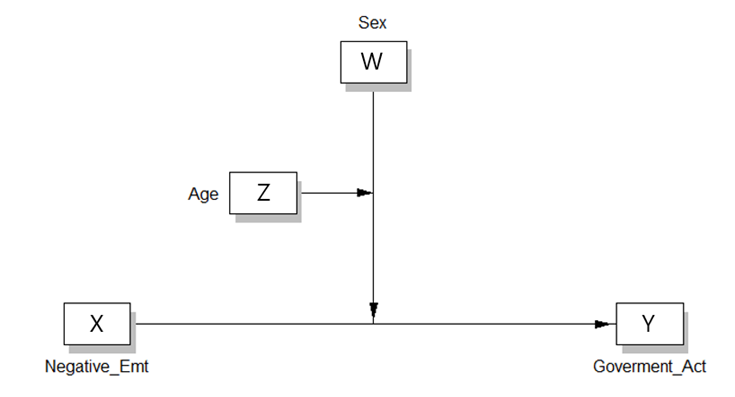

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


In [ ]:
Y = data_2['govact']

In [ ]:
X = np.array(data_2['negemot'])
W = np.array(data_2['sex'])
Z = np.array(data_2['age'])

In [ ]:
res_y = ols('govact ~ negemot + sex + age + negemot * sex + negemot * age + sex * age + negemot * age * sex', data=data_2).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     68.44
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.84e-77
Time:                        14:06:23   Log-Likelihood:                -1216.9
No. Observations:                 815   AIC:                             2450.
Df Residuals:                     807   BIC:                             2487.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6733      0.485      7.581      0.000       2.722       4.624
negemot             0.3120      0.122      2.555      0.011       0.072       0.552
sex                 0.5985      0.669      0.895      0.371      -0.715       1.912
age                -0.0071      0.010     -0.725      0.469      -0.026       0.012
negemot:sex        -0.1413      0.173     -0.816      0.415      -0.481       0.199
negemot:age         0.0012      0.002      0.491      0.623      -0.004       0.006
sex:age            -0.0287      0.013     -2.260      0.024      -0.054      -0.004
negemot:age:sex     0.0072      0.003      2.188      0.029       0.001       0.014
==============================================================================
Omnibus:                       10.987   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.459
Skew:                          -0.240   Prob(JB):                      0.00325
Kurtosis:                       3.326   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res_y.params

Intercept          3.673337
negemot            0.311980
sex                0.598457
age               -0.007108
negemot:sex       -0.141264
negemot:age        0.001223
sex:age           -0.028734
negemot:age:sex    0.007207
dtype: float64

* R^2 & F

In [ ]:
TSS = ((Y-Y.mean())**2).sum()
SSR = ((Y_hat-Y.mean())**2).sum()
SSE = ((Y-Y_hat)**2).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.3724956708599062


In [ ]:
F = (SSR/7) / (SSE/807)
print(F)

68.10581672739143


In [ ]:
f_rv = f(7, 807)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑌=3.6733+0.3120𝑋+0.5985𝑊−0.0071𝑍−0.1413𝑋𝑊+0.0012𝑋𝑍−0.0287𝑊𝑍+0.0072𝑋𝑊𝑍 
## * 𝜃_(𝑋→𝑌)=0.3120−0.1413𝑊+0.0012𝑍+0.0072𝑊𝑍

----

# 3) model 16(bike data)

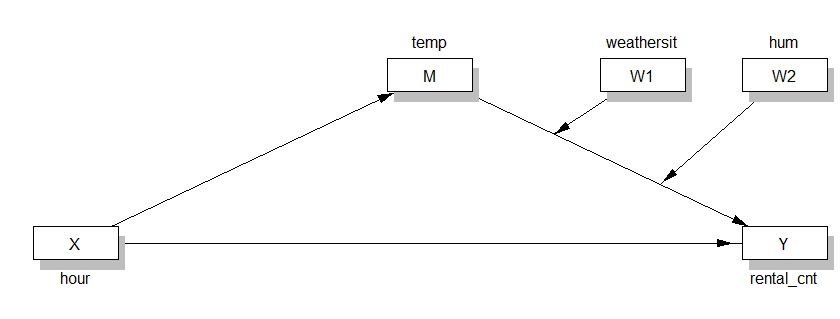

X: hour(시간)  
M: temp(기온)  
Y: rental_cnt(자전거 렌탈횟수)  
W: weathersit  
Z: hum(습도)

---- 
weathersit
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  


In [ ]:
data_16 = pd.read_csv('/content/Drive/MyDrive/논문/model_16_bike.csv')
data_16.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,2011-01-01,1,1,0.22,0.2727,0.80,0.0,8,0.040000
1,2011-01-01,2,1,0.22,0.2727,0.80,0.0,5,0.031795
2,2011-01-01,4,1,0.24,0.2879,0.75,0.0,0,0.000000
3,2011-01-01,6,1,0.22,0.2727,0.80,0.0,2,0.001026
4,2011-01-01,7,1,0.20,0.2576,0.86,0.0,1,0.002051


In [ ]:
X = data_16['hr']
M = data_16['temp']
Y = data_16['cnt']
W = data_16['weathersit']
Z = data_16['hum']

* M (temp)

In [ ]:
res_m = ols('temp ~ hr', data=data_16).fit()
res_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.24e-51
Time:                        19:42:51   Log-Likelihood:                 2601.8
No. Observations:               10948   AIC:                            -5200.
Df Residuals:                   10946   BIC:                            -5185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4520      0.004    127.045      0.000       0.445       0.459
hr             0.0040      0.000     15.133      0.000       0.003       0.005
==============================================================================
Omnibus:                     2218.809   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.719
Skew:                          -0.033   Prob(JB):                     8.93e-96
Kurtosis:                       2.023   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res_m.params

Intercept    0.452000
hr           0.003991
dtype: float64

* Y(rental_cnt)

In [ ]:
res_y = ols('cnt ~ hr + temp + weathersit + hum + temp * weathersit + temp * hum', data=data_16).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     907.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:35   Log-Likelihood:                 5019.8
No. Observations:               10948   AIC:                        -1.003e+04
Df Residuals:                   10941   BIC:                            -9974.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0745      0.014     -5.146      0.000      -0.103      -0.046
hr                  0.0075      0.000     33.547      0.000       0.007       0.008
temp                0.6419      0.027     24.014      0.000       0.589       0.694
weathersit         -0.0311      0.007     -4.247      0.000      -0.045      -0.017
hum                 0.1165      0.025      4.729      0.000       0.068       0.165
temp:weathersit     0.0528      0.014      3.715      0.000       0.025       0.081
temp:hum           -0.6545      0.046    -14.156      0.000      -0.745      -0.564
==============================================================================
Omnibus:                     2780.466   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.625
Skew:                           1.410   Prob(JB):                         0.00
Kurtosis:                       5.603   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res_y.params

Intercept         -0.074501
hr                 0.007507
temp               0.641873
weathersit        -0.031087
hum                0.116519
temp:weathersit    0.052847
temp:hum          -0.654486
dtype: float64

In [ ]:
Y_hat = -0.0745+0.0075*X+0.6419*M-0.0311*W+0.1165*Z+0.0528*M*W-0.6545*M*Z

* R^2 & F

In [ ]:
TSS = ((Y-Y.mean())**2).sum()
SSR = ((Y_hat-Y.mean())**2).sum()
SSE = ((Y-Y_hat)**2).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.33228100159467533


In [ ]:
F = (SSR/6) / (SSE/10941)
print(F)

906.9571410662246


In [ ]:
f_rv = f(6, 10941)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑀=0.4520+0.0040𝑋
## * 𝑌=−0.0745+0.0075𝑋+0.6419𝑀−0.0311𝑊+0.1165𝑍+0.0528𝑀𝑊−0.6545𝑀𝑍



----

# 4) model 11(binladen data)



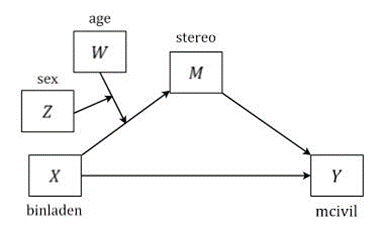

X : news_content(0: 빈라덴죽음 발표 전, 1: 빈라덴죽음 들었을 때)  
M : stereo(미국의 사는 무슬림에 대한 부정적인 고정관념에 대한 지지정도 평균)  
Y : mcivil(미국의 사는 무슬림의 자유제한 지지정도 평균)  
W : age(나이) ex) 7.5 -> 75살   
Z : sex(성별, 0: female, 1: male) 



In [ ]:
data_11 = pd.read_csv('/content/Drive/MyDrive/논문/model_11.csv')
data_11.head()

,news_content,rthreat,stereo,mcivil,age,ideo,sex
0,0,3.00,2.8,2.8,7.5,8,0
1,1,2.00,1.8,3.2,3.3,4,1
2,1,2.25,2.0,2.8,5.6,6,0
3,1,2.00,2.6,3.4,4.0,5,1
4,1,4.00,4.2,4.0,5.9,8,1


In [ ]:
X = data_11['news_content']
M = data_11['stereo']
Y = data_11['mcivil']
W = data_11['age']
Z = data_11['sex']

* M (stereo)

In [ ]:
res_m = ols('stereo ~ news_content + age + sex + news_content * age + news_content * sex + age * sex + news_content * age * sex', data=data_11).fit()
res_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stereo   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.683
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           0.000650
Time:                        15:05:39   Log-Likelihood:                -824.71
No. Observations:                 661   AIC:                             1665.
Df Residuals:                     653   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2640      0.196     11.556      0.000       1.879       2.649
news_content             1.1823      0.318      3.722      0.000       0.559       1.806
age                      0.1154      0.036      3.172      0.002       0.044       0.187
sex                      0.2934      0.266      1.103      0.271      -0.229       0.816
news_content:age        -0.2016      0.059     -3.405      0.001      -0.318      -0.085
news_content:sex        -1.2697      0.424     -2.994      0.003      -2.103      -0.437
age:sex                 -0.0404      0.052     -0.781      0.435      -0.142       0.061
news_content:age:sex     0.2303      0.083      2.787      0.005       0.068       0.393
==============================================================================
Omnibus:                        6.560   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.419
Skew:                           0.232   Prob(JB):                       0.0404
Kurtosis:                       3.132   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res_m.params

Intercept               2.264001
news_content            1.182291
age                     0.115438
sex                     0.293353
news_content:age       -0.201573
news_content:sex       -1.269740
age:sex                -0.040449
news_content:age:sex    0.230330
dtype: float64

* Y(mcivil)

In [ ]:
res_y = ols('mcivil ~ news_content + stereo', data=data_11).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mcivil   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.90e-39
Time:                        15:05:42   Log-Likelihood:                -869.04
No. Observations:                 661   AIC:                             1744.
Df Residuals:                     658   BIC:                             1758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9320      0.126      7.369      0.000       0.684       1.180
news_content    -0.0518      0.072     -0.724      0.469      -0.192       0.089
stereo           0.5861      0.041     14.311      0.000       0.506       0.666
==============================================================================
Omnibus:                       22.495   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.202
Skew:                           0.469   Prob(JB):                     5.55e-06
Kurtosis:                       2.994   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res_y.params

Intercept       0.931951
news_content   -0.051793
stereo          0.586054
dtype: float64

In [ ]:
Y_hat = 0.9320-0.0518*X+0.5861*M

* R^2 & F

In [ ]:
TSS = ((Y-Y.mean())**2).sum()
SSR = ((Y_hat-Y.mean())**2).sum()
SSE = ((Y-Y_hat)**2).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.23738632192774767


In [ ]:
F = (SSR/2) / (SSE/658)
print(F)

102.42706731854874


In [ ]:
f_rv = f(2, 658)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑀=2.2640+1.1823𝑋+0.1154𝑊+0.2934𝑍-0.2016𝑋𝑊-1.2697𝑋𝑍-0.0404𝑊𝑍+0.2303𝑋𝑊𝑍
## * 𝑌=0.9320-0.0518𝑋+0.5861𝑀

----

# 5) model 11 (solar data)

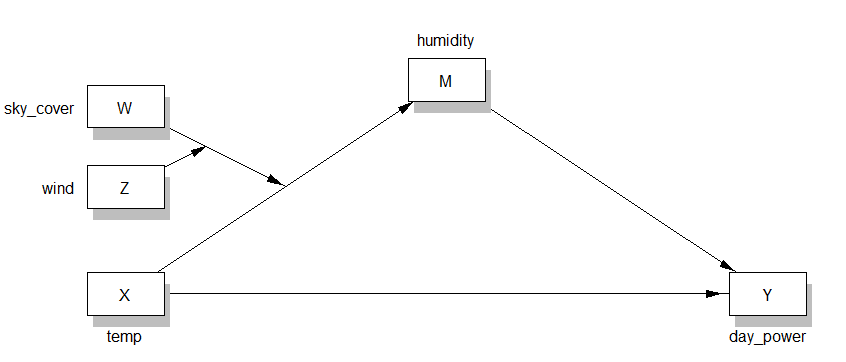

 X : temp(기온)  
M : humidity(습도)  
Y : day_power(태양광 발전량)  
W : sky_cover(운량)  
Z : wind(풍속)  



In [4]:
data_11 = pd.read_csv('/content/Drive/MyDrive/논문/model_18.csv')
data_11.head()

,temp,wind,humidity,barometer,day_power,sky_cover
0,0.312052,0.234784,0.778769,0.638520,0.058824,2
1,0.369939,0.412924,0.725910,0.424439,0.058824,3
2,0.352761,0.572187,0.709644,0.296313,0.058824,5
3,0.348520,0.334605,0.751113,0.118489,0.029412,3
4,0.348466,0.313384,0.735478,0.160241,0.029412,6


In [5]:
X = data_11['temp']
M = data_11['humidity']
Y = data_11['day_power']

* M (humidity)

In [6]:
res_m = ols('humidity ~ temp + sky_cover + wind + temp * sky_cover + temp * wind + sky_cover * wind + temp * sky_cover * wind', data=data_11).fit()
res_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     91.23
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.43e-108
Time:                        11:14:09   Log-Likelihood:                 817.11
No. Observations:                1332   AIC:                            -1618.
Df Residuals:                    1324   BIC:                            -1577.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9370      0.053     17.802      0.000       0.834       1.040
temp                   -0.9212      0.119     -7.726      0.000      -1.155      -0.687
sky_cover              -0.0035      0.013     -0.262      0.793      -0.029       0.022
wind                   -0.9191      0.184     -4.990      0.000      -1.280      -0.558
temp:sky_cover          0.0777      0.030      2.562      0.011       0.018       0.137
temp:wind               2.0611      0.432      4.766      0.000       1.213       2.909
sky_cover:wind          0.1339      0.045      2.957      0.003       0.045       0.223
temp:sky_cover:wind    -0.3276      0.107     -3.064      0.002      -0.537      -0.118
==============================================================================
Omnibus:                       44.937   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.953
Skew:                          -0.427   Prob(JB):                     1.42e-11
Kurtosis:                       3.414   Cond. No.                         718.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
res_m.params

Intercept              0.936967
temp                  -0.921213
sky_cover             -0.003455
wind                  -0.919070
temp:sky_cover         0.077705
temp:wind              2.061073
sky_cover:wind         0.133905
temp:sky_cover:wind   -0.327559
dtype: float64

* Y(day_power)

In [8]:
res_y = ols('day_power ~ temp + humidity', data=data_11).fit()
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              day_power   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.81e-313
Time:                        11:14:15   Log-Likelihood:                 727.26
No. Observations:                1332   AIC:                            -1449.
Df Residuals:                    1329   BIC:                            -1433.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6099      0.026     23.783      0.000       0.560       0.660
temp           0.4950      0.024     20.791      0.000       0.448       0.542
humidity      -0.8307      0.028    -29.797      0.000      -0.885      -0.776
==============================================================================
Omnibus:                       27.282   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.420
Skew:                           0.349   Prob(JB):                     6.74e-07
Kurtosis:                       3.158   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
res_y.params

Intercept    0.609884
temp         0.494987
humidity    -0.830676
dtype: float64

In [10]:
Y_hat = 0.6099+0.4950*X-0.8307*M

* R^2 & F

In [11]:
TSS = ((Y-Y.mean())**2).sum()
SSR = ((Y_hat-Y.mean())**2).sum()
SSE = ((Y-Y_hat)**2).sum()

In [12]:
R = 1 - SSE / TSS
print(R)

0.6616569189384847


In [13]:
F = (SSR/2) / (SSE/1329)
print(F)

1299.5546545607747


In [14]:
f_rv = f(2, 1329)

In [15]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑀=0.9370-0.9212𝑋-0.0035𝑊-0.9191𝑍+0.0777𝑋𝑊+2.0611𝑋𝑍+0.1339𝑊𝑍-0.3276𝑋𝑊𝑍
## * 𝑌=0.6099+0.4950𝑋-0.8307𝑀

----